In [2]:
import astropy.constants as ca
import numpy as np  


In [94]:
#define constants and params
mS = ca.M_sun.value
mK5 = 0.7*ca.M_sun.value
mEM = ca.M_earth.value + 0.0123 * ca.M_earth.value
mE = ca.M_earth.value
e = 0.0167 #wiki
a = ca.au.value
G = ca.G.value
incl = np.arange(0,np.pi,np.pi/64)

In [61]:
#define RV_semi_amplitude by Lovis and Fisher 
def RV_semi_amplitude(m1,m2,e,i,a): 
    return np.absolute(np.sqrt(G/(1-e**2)) * m2 * np.sin(i) * 1/np.sqrt((m1+m2)*a))

In [62]:
import matplotlib.pyplot as plt 

In [114]:
#different star masses from G5 to K5 
K5 = 0.7 * mS 
G2 = mS
mstars = np.arange(K5,G2,0.1*mS)

<IPython.core.display.Javascript object>


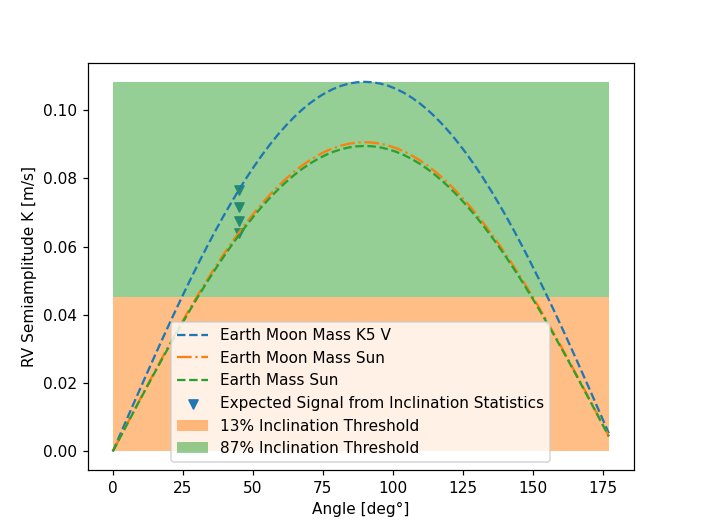

In [117]:
%matplotlib notebook 
plt.plot(incl/np.pi * 180,RV_semi_amplitude(mK5,mEM,e,incl,a), "--",label = "Earth Moon Mass K5 V") 
plt.plot(incl/np.pi * 180,RV_semi_amplitude(mS,mEM,e,incl,a), "-.",label = "Earth Moon Mass Sun") 
plt.plot(incl/np.pi * 180,RV_semi_amplitude(mS,mE,e,incl,a),"--", label = "Earth Mass Sun") 
#plt.plot(incl/np.pi*180, 0.5*np.max(RV_semi_amplitude(mS,mEM,e,incl,a))*np.ones(len(incl)))
plt.scatter(np.ones(len(mstars))*np.pi/4/np.pi*180,RV_semi_amplitude(mstars,mEM,e,np.pi/4,a),marker = "v",label = "Expected Signal from Inclination Statistics")
plt.fill_between(incl/np.pi*180, 0.5*np.max(RV_semi_amplitude(mS,mEM,e,incl,a))*np.ones(len(incl)),alpha = 0.5, label = "13% Inclination Threshold") 
plt.fill_between(incl/np.pi*180, y1=0.5*np.max(RV_semi_amplitude(mS,mEM,e,incl,a))*np.ones(len(incl)),y2 = np.max(RV_semi_amplitude(mK5,mEM,e,incl,a)),alpha = 0.5, label = "87% Inclination Threshold")

plt.ylabel("RV Semiamplitude K [m/s]")
plt.xlabel("Angle [deg°]")
plt.legend(frameon = True)
#plt.plot(incl/np.pi*180,np.sin(incl)  ) 

In [101]:
K_expected = RV_semi_amplitude(mS,mEM,e,np.asarray([np.pi/4,np.pi/2]),a) 
K_expected #expected and maximum 

array([0.06404325, 0.09057083])

In [100]:
K_expected = RV_semi_amplitude(mK5,mEM,e,np.asarray([np.pi/4,np.pi/2]),a) 
K_expected  #expected and maximum

array([0.07654627, 0.10825278])

The inclination angeles are statistically distributed. Thats why it is much more probable to observe a close to edge on system since the a priori porbability of $sin(i) > 0.5$ is 87%. On average the $\bar{sin(i)} = \pi/4$. Is the Earth 2.0 completly the same also in terms of a very close in and massive Moon, the most important factor is the inclination. If the average value is assumed, then an Earth Moon analog would cause a RV semiamplitude of $\mathrm{K_{EM}} = 0.064 \mathrm{m/s}$. For a K5 star the amplitude would increase to up to $\mathrm{K_{EM}} = 0.0765  \mathrm{m/s}$